In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import numpy as np

# MLB Team Pitching Stats 2010-2019

In [243]:
pitch_2010 = pd.read_csv("pitching_2010.csv")
pitch_2011 = pd.read_csv("pitching_2011.csv")
pitch_2012 = pd.read_csv("pitching_2012.csv")
pitch_2013 = pd.read_csv("pitching_2013.csv")
pitch_2014 = pd.read_csv("pitching_2014.csv")
pitch_2015 = pd.read_csv("pitching_2015.csv")
pitch_2016 = pd.read_csv("pitching_2016.csv")
pitch_2017 = pd.read_csv("pitching_2017.csv")
pitch_2018 = pd.read_csv("pitching_2018.csv")
pitch_2019 = pd.read_csv("pitching_2019.csv")
all_years = [pitch_2010, pitch_2011, pitch_2012, pitch_2013, pitch_2014, pitch_2015, pitch_2016, pitch_2017, pitch_2018, pitch_2019]
combined = pd.concat(all_years)
combined

,#,LVL,YEAR,TEAM,IP,PA,R,ERA,FIP,cFIP,...,oppAVG,oppOBP,oppSLG,oppOPS,WHIP,DRA,DRA-,DRA_START,DRA_RELIEF,PWARP
0,1,MLB,2010,Angels,"1,449.3","6,252",702,4.04,4.08,102,...,0.000,0.000,0.000,0.000,1.37,4.47,101,0.00,0.00,11.60
1,2,MLB,2010,Twins,"1,452.7","6,106",671,3.95,3.88,97,...,0.000,0.000,0.000,0.000,1.29,4.35,98,0.00,0.00,13.39
2,3,MLB,2010,Yankees,"1,442.3","6,102",693,4.06,4.31,105,...,0.000,0.000,0.000,0.000,1.31,4.46,101,0.00,0.00,11.52
3,4,MLB,2010,Mets,"1,453.0","6,245",652,3.70,4.01,99,...,0.000,0.000,0.000,0.000,1.36,4.36,98,0.00,0.00,13.27
4,5,MLB,2010,Athletics,"1,431.7","6,011",626,3.56,4.09,98,...,0.000,0.000,0.000,0.000,1.28,4.07,92,0.00,0.00,17.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,MLB,2019,Tigers,"1,433.0","6,341",915,5.24,4.87,104,...,0.256,0.324,0.442,0.766,1.46,5.59,115,5.73,5.41,-0.12
26,27,MLB,2019,Astros,"1,462.3","5,995",640,3.66,4.01,90,...,0.250,0.321,0.435,0.756,1.13,4.10,84,3.76,4.67,23.94
27,28,MLB,2019,Royals,"1,425.0","6,307",869,5.20,4.93,109,...,0.256,0.323,0.442,0.765,1.48,6.00,123,6.24,5.64,-6.21
28,29,MLB,2019,Dodgers,"1,445.7","5,913",613,3.37,3.68,89,...,0.250,0.318,0.426,0.744,1.10,3.58,74,3.25,4.11,31.87


In [244]:
combined.IP.replace(' ', inplace=True)
combined.IP = combined.IP.str.replace(',', '')
combined.IP = combined.IP.astype(float)

combined.PA.replace(' ', inplace=True)
combined.PA = combined.PA.str.replace(',', '')
combined.PA = combined.PA.astype(float)


In [259]:
combined.index.is_unique
combined.index.duplicated()
combined.loc[~combined.index.duplicated(), :]
combined.drop_duplicates()

,#,LVL,YEAR,TEAM,IP,PA,R,ERA,FIP,cFIP,...,oppAVG,oppOBP,oppSLG,oppOPS,WHIP,DRA,DRA-,DRA_START,DRA_RELIEF,PWARP
0,1,MLB,2010,Angels,1449.3,6252.0,702,4.04,4.08,102,...,0.000,0.000,0.000,0.000,1.37,4.47,101,0.00,0.00,11.60
1,2,MLB,2010,Twins,1452.7,6106.0,671,3.95,3.88,97,...,0.000,0.000,0.000,0.000,1.29,4.35,98,0.00,0.00,13.39
2,3,MLB,2010,Yankees,1442.3,6102.0,693,4.06,4.31,105,...,0.000,0.000,0.000,0.000,1.31,4.46,101,0.00,0.00,11.52
3,4,MLB,2010,Mets,1453.0,6245.0,652,3.70,4.01,99,...,0.000,0.000,0.000,0.000,1.36,4.36,98,0.00,0.00,13.27
4,5,MLB,2010,Athletics,1431.7,6011.0,626,3.56,4.09,98,...,0.000,0.000,0.000,0.000,1.28,4.07,92,0.00,0.00,17.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,MLB,2019,Tigers,1433.0,6341.0,915,5.24,4.87,104,...,0.256,0.324,0.442,0.766,1.46,5.59,115,5.73,5.41,-0.12
26,27,MLB,2019,Astros,1462.3,5995.0,640,3.66,4.01,90,...,0.250,0.321,0.435,0.756,1.13,4.10,84,3.76,4.67,23.94
27,28,MLB,2019,Royals,1425.0,6307.0,869,5.20,4.93,109,...,0.256,0.323,0.442,0.765,1.48,6.00,123,6.24,5.64,-6.21
28,29,MLB,2019,Dodgers,1445.7,5913.0,613,3.37,3.68,89,...,0.250,0.318,0.426,0.744,1.10,3.58,74,3.25,4.11,31.87


In [260]:
combined

,#,LVL,YEAR,TEAM,IP,PA,R,ERA,FIP,cFIP,...,oppAVG,oppOBP,oppSLG,oppOPS,WHIP,DRA,DRA-,DRA_START,DRA_RELIEF,PWARP
0,1,MLB,2010,Angels,1449.3,6252.0,702,4.04,4.08,102,...,0.000,0.000,0.000,0.000,1.37,4.47,101,0.00,0.00,11.60
1,2,MLB,2010,Twins,1452.7,6106.0,671,3.95,3.88,97,...,0.000,0.000,0.000,0.000,1.29,4.35,98,0.00,0.00,13.39
2,3,MLB,2010,Yankees,1442.3,6102.0,693,4.06,4.31,105,...,0.000,0.000,0.000,0.000,1.31,4.46,101,0.00,0.00,11.52
3,4,MLB,2010,Mets,1453.0,6245.0,652,3.70,4.01,99,...,0.000,0.000,0.000,0.000,1.36,4.36,98,0.00,0.00,13.27
4,5,MLB,2010,Athletics,1431.7,6011.0,626,3.56,4.09,98,...,0.000,0.000,0.000,0.000,1.28,4.07,92,0.00,0.00,17.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,MLB,2019,Tigers,1433.0,6341.0,915,5.24,4.87,104,...,0.256,0.324,0.442,0.766,1.46,5.59,115,5.73,5.41,-0.12
26,27,MLB,2019,Astros,1462.3,5995.0,640,3.66,4.01,90,...,0.250,0.321,0.435,0.756,1.13,4.10,84,3.76,4.67,23.94
27,28,MLB,2019,Royals,1425.0,6307.0,869,5.20,4.93,109,...,0.256,0.323,0.442,0.765,1.48,6.00,123,6.24,5.64,-6.21
28,29,MLB,2019,Dodgers,1445.7,5913.0,613,3.37,3.68,89,...,0.250,0.318,0.426,0.744,1.10,3.58,74,3.25,4.11,31.87


In [246]:
combined.dtypes

#                  int64
LVL               object
YEAR               int64
TEAM              object
IP               float64
PA               float64
R                  int64
ERA              float64
FIP              float64
cFIP               int64
cFIP_START         int64
cFIP_RELIEF        int64
FIP_MINUS_ERA    float64
SO9              float64
BB9              float64
SO/BB            float64
HR9              float64
oppAVG           float64
oppOBP           float64
oppSLG           float64
oppOPS           float64
WHIP             float64
DRA              float64
DRA-               int64
DRA_START        float64
DRA_RELIEF       float64
PWARP            float64
dtype: object

1. With a barplot what is the average amount of runs each team gave up per season?

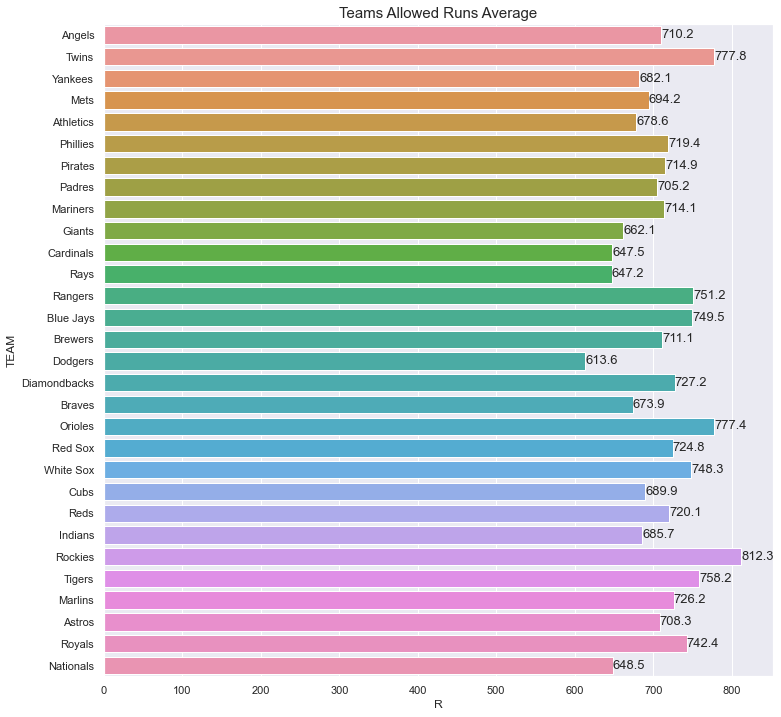

In [261]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(x=combined.R ,y= combined.TEAM,
data = combined,
ci=None)
ax.bar_label(ax.containers[0],fontsize=13)
plt.title("Teams Allowed Runs Average",fontsize=15);

2. With a lineplot show the ERA for the Cardinals and the Cubs throught all the years?

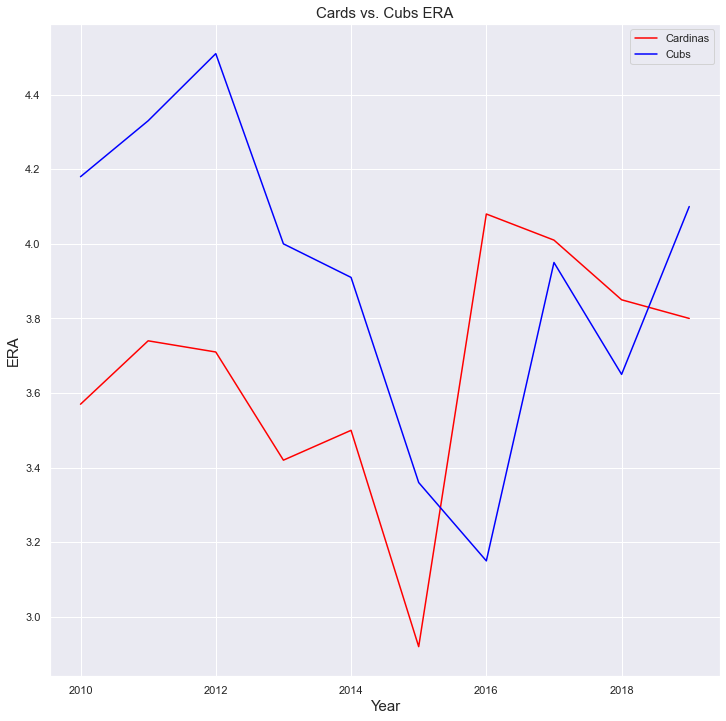

In [278]:
x = combined.YEAR.unique()
y = combined[combined.TEAM == 'Cardinals'].ERA
z = combined[combined.TEAM == 'Cubs'].ERA

plt.plot(x,y, color=('red'))
plt.plot(x,z,color='blue')
plt.legend(["Cardinas", "Cubs"])
plt.xlabel("Year",fontsize=15)
plt.ylabel("ERA",fontsize=15)
plt.title("Cards vs. Cubs ERA",fontsize=15)
plt.show()